In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

In [134]:
df = pd.read_csv("all_data.csv").drop(columns=['Unnamed: 0'])

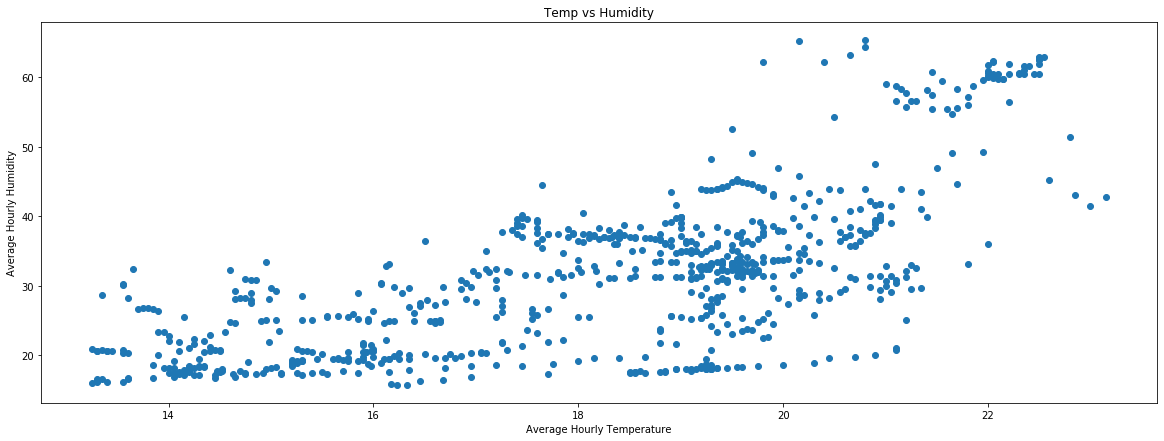

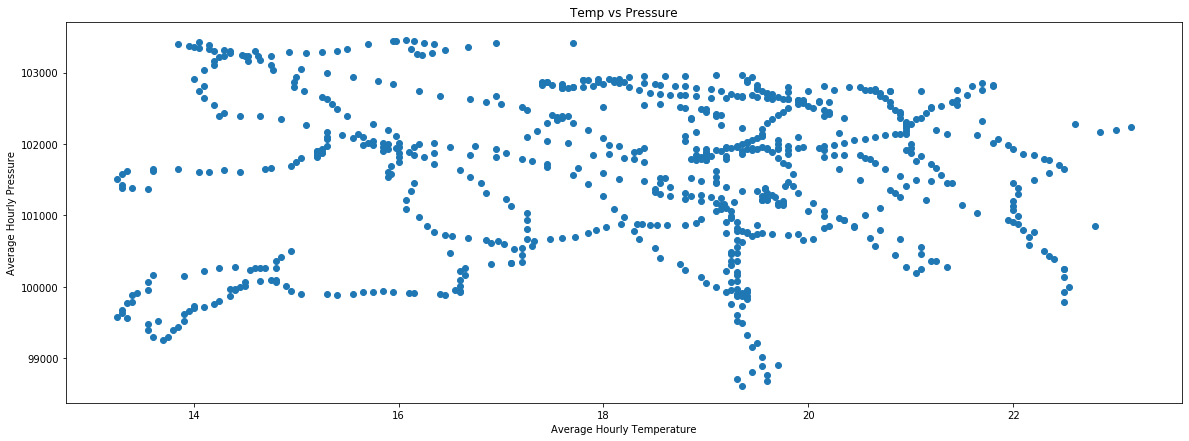

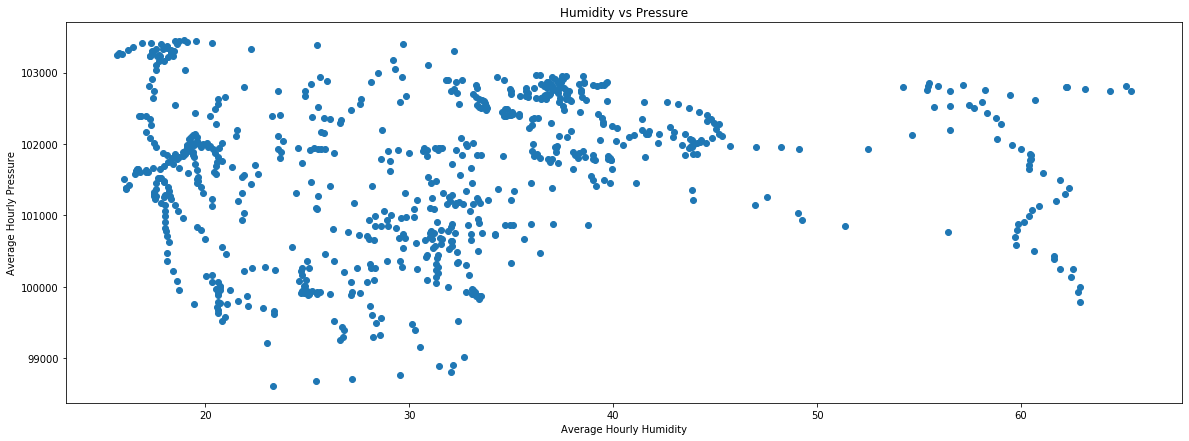

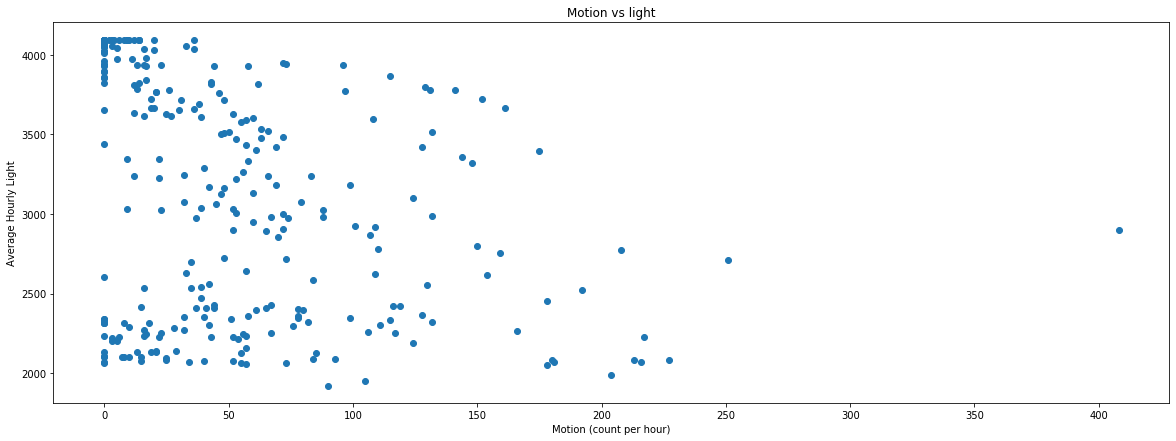

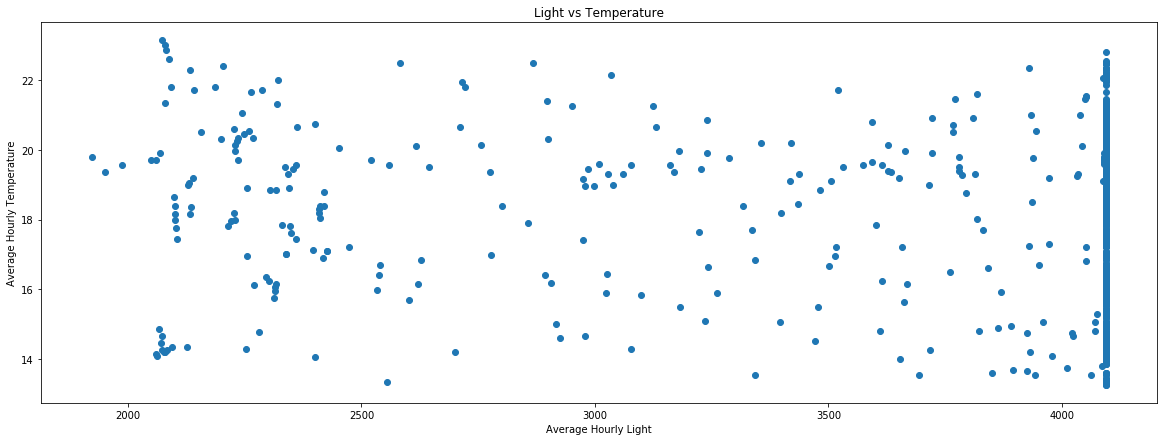

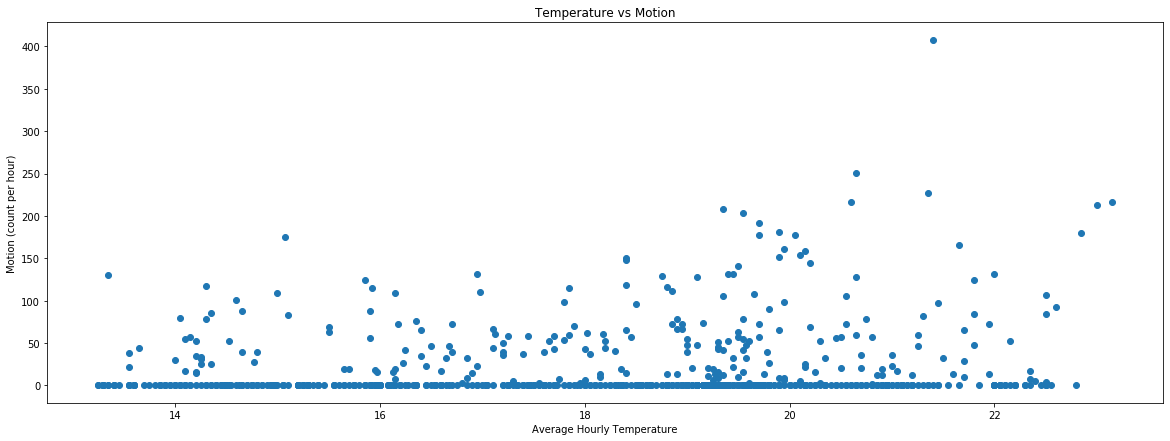

In [135]:
# predict business - number of obligations that day, or indicators: 0 less busy, 1 very busy
plt.scatter(df['avg_hrly_temp'], df['avg_hrly_hum'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Average Hourly Humidity")
plt.title("Temp vs Humidity")
plt.show()

plt.scatter(df['avg_hrly_temp'], df['avg_hrly_press'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Average Hourly Pressure")
plt.title("Temp vs Pressure")
plt.show()

plt.scatter(df['avg_hrly_hum'], df['avg_hrly_press'])
plt.xlabel("Average Hourly Humidity")
plt.ylabel("Average Hourly Pressure")
plt.title("Humidity vs Pressure")
plt.show()

plt.scatter(df['tot_motion_count'], df['avg_hrly_light'])
plt.xlabel("Motion (count per hour)")
plt.ylabel("Average Hourly Light")
plt.title("Motion vs light")
plt.show()

plt.scatter(df['avg_hrly_light'], df['avg_hrly_temp'])
plt.xlabel("Average Hourly Light")
plt.ylabel("Average Hourly Temperature")
plt.title("Light vs Temperature")
plt.show()

plt.scatter(df['avg_hrly_temp'],df['tot_motion_count'])
plt.xlabel("Average Hourly Temperature")
plt.ylabel("Motion (count per hour)")
plt.title("Temperature vs Motion")
plt.show()

In [136]:
df.columns

Index(['day', 'hour', 'month', 'weekday', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light', 'num_hrs_slept',
       'num_psets_due'],
      dtype='object')

In [137]:
np.unique(df.num_psets_due)

array([0, 1, 2, 3])

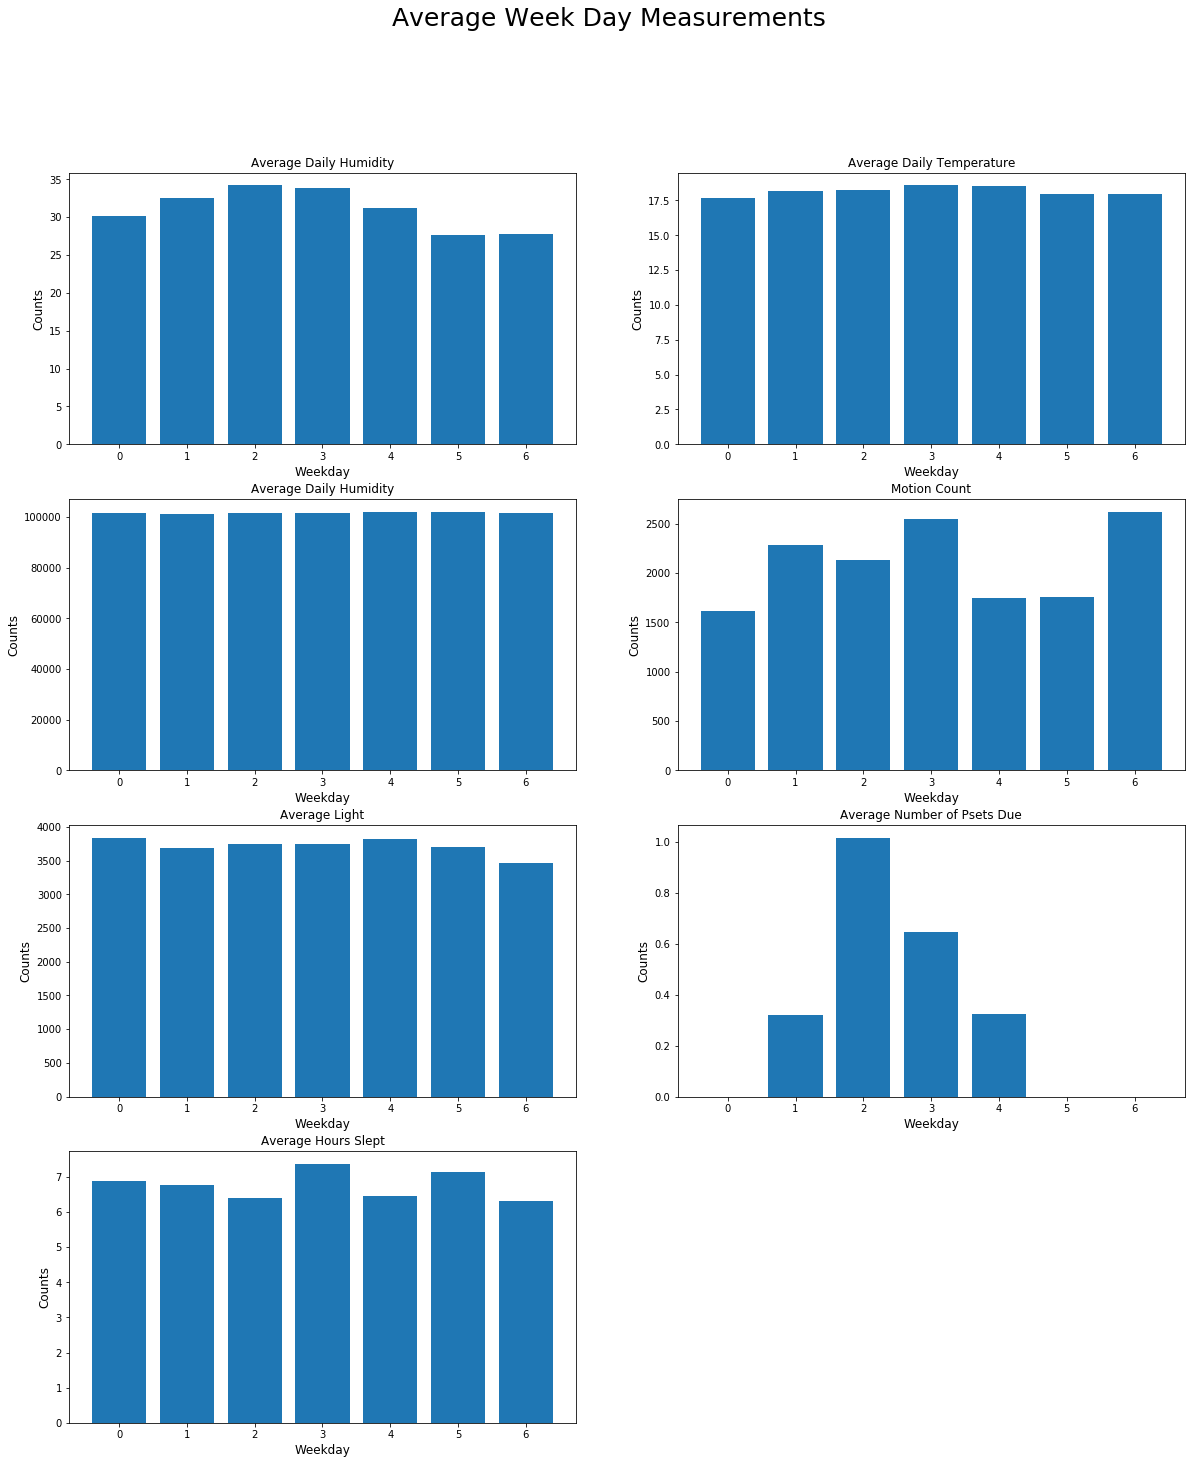

In [175]:
df_by_day = df.groupby("weekday").agg({'avg_hrly_hum':'mean', 'avg_hrly_temp':'mean',
                                                  'avg_hrly_press':'mean','tot_motion_count':'sum',
                                                  'avg_hrly_light':'mean', 'num_psets_due':'mean', 'num_hrs_slept':'mean'})
label = ["M", "T", "W", "Th", "F", "Sat", "Sun"]
cols = ['avg_hrly_hum', 'avg_hrly_temp', 'avg_hrly_press','tot_motion_count',
       'avg_hrly_light', 'num_psets_due', 'num_hrs_slept']
titles = ['Average Daily Humidity', 'Average Daily Temperature', 'Average Daily Humidity','Motion Count',
       'Average Light', 'Average Number of Psets Due', 'Average Hours Slept']

fig, axes = plt.subplots(4,2,figsize=(20,23))
axes = axes.ravel()
for i in range(7):
    # axes[0].violin(dist_by_day.index, dist_by_day.casual)
    axes[i].bar(df_by_day.index, df_by_day[cols[i]])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Weekday", fontsize=12)
    axes[i].set_ylabel("Counts", fontsize=12)
    plt.axis('off')
plt.suptitle('Average Week Day Measurements', fontsize = 25)
plt.savefig("avg_daily_counts.png")
plt.show()


In [139]:
df_by_day.columns

Index(['avg_hrly_hum', 'avg_hrly_temp', 'avg_hrly_press', 'tot_motion_count',
       'avg_hrly_light', 'num_psets_due', 'num_hrs_slept'],
      dtype='object')

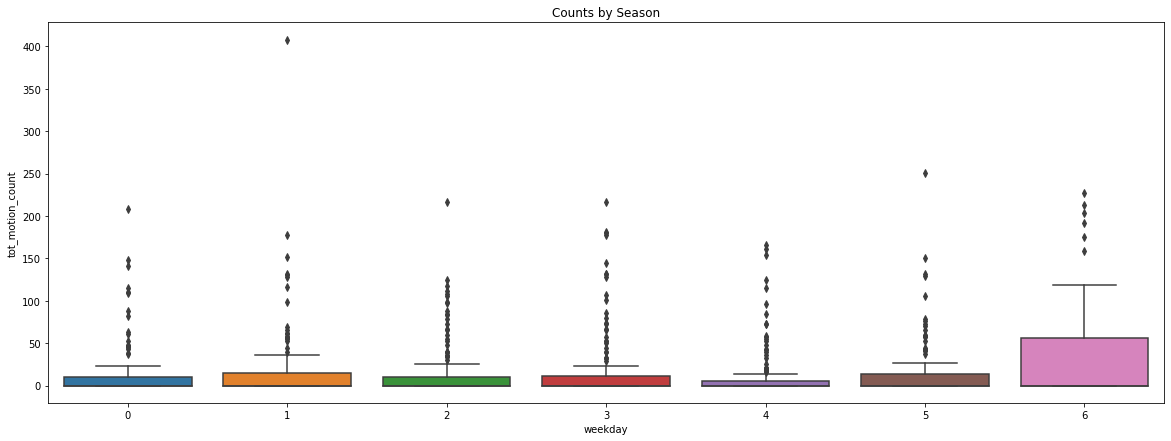

In [140]:
import seaborn as sns
sns.boxplot(x='weekday', y="tot_motion_count", data=df) # - sns package in section but not notebook?
plt.title("Counts by Season")
plt.grid(False)
plt.show()

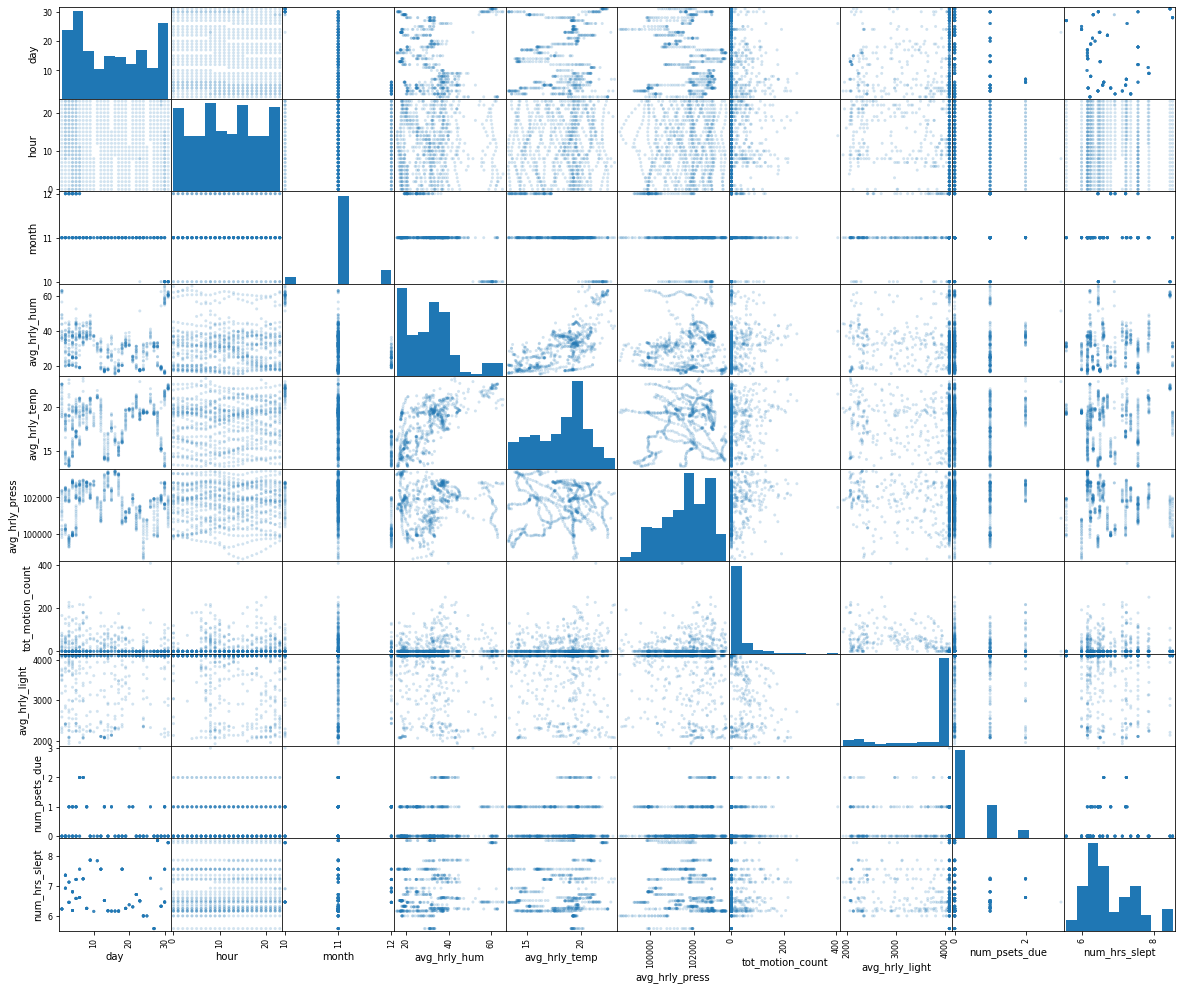

In [177]:
# how to make this figure bigger?
cor_columns = ['day', 'hour', 'month', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light',
       'num_psets_due', 'num_hrs_slept']

#plt.figure(figsize = (20,20))
scatter_matrix(df[cor_columns], alpha=0.2, figsize=(20,17))
plt.savefig('scatter.png')
plt.show()


In [182]:
df.columns

Index(['day', 'hour', 'month', 'weekday', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light', 'num_hrs_slept',
       'num_psets_due'],
      dtype='object')

Correlations found: humidity and temperature

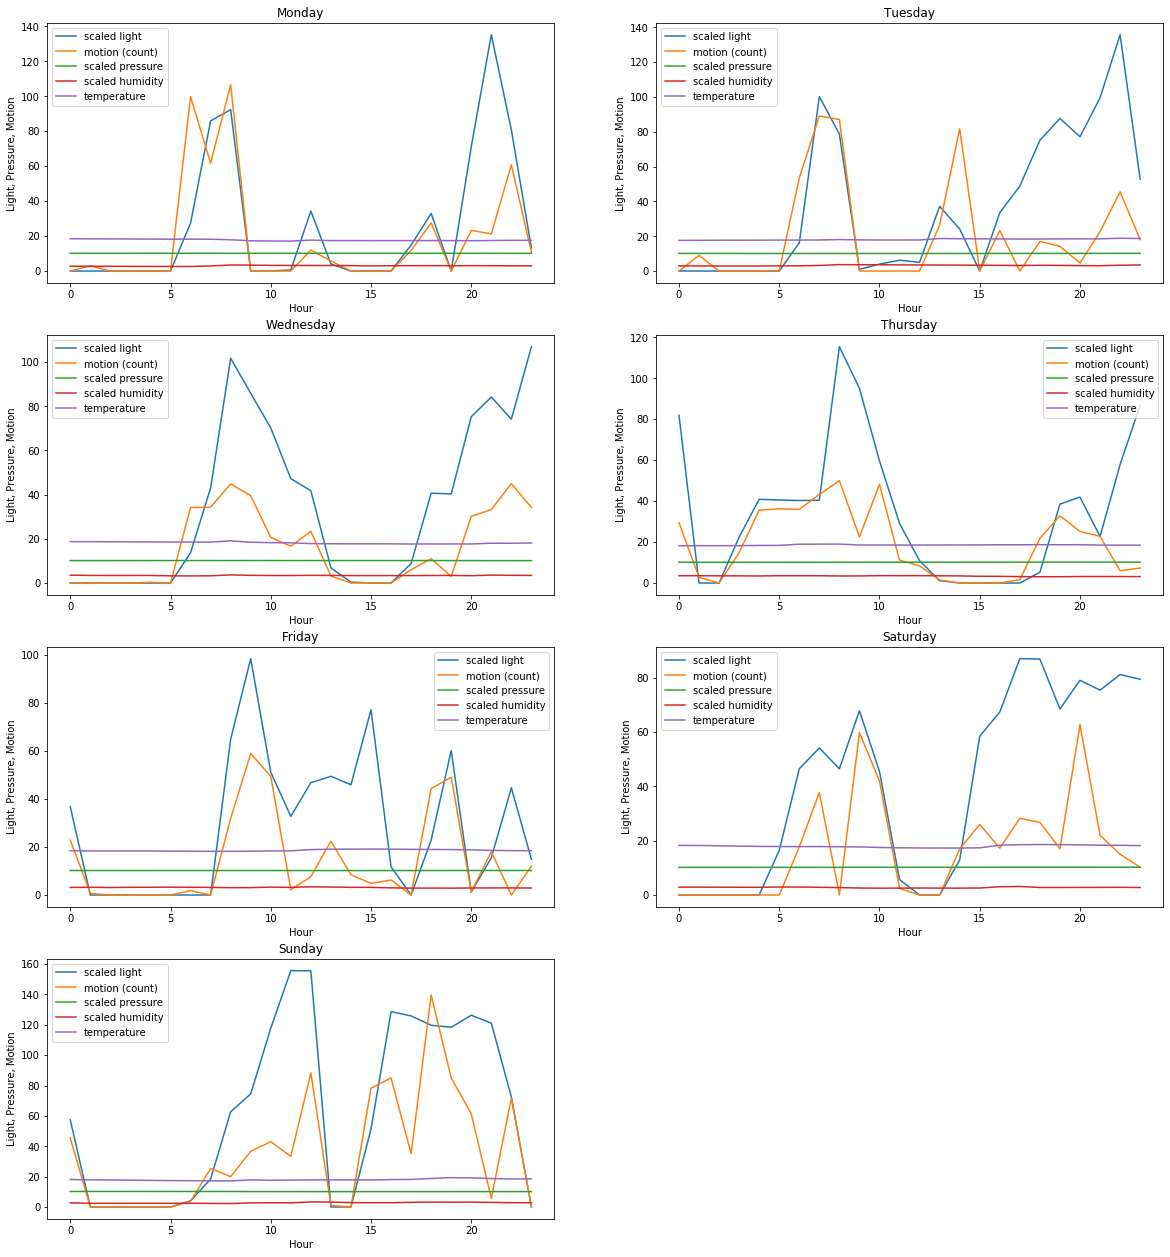

In [190]:
def return_weekday_avgs(col, df):
    d1 = {col:'mean'}
    M = df[df.weekday == 0].groupby("hour").aggregate(d1)
    T = df[df.weekday == 1].groupby("hour").aggregate(d1)
    W = df[df.weekday == 2].groupby("hour").aggregate(d1)
    TH = df[df.weekday == 3].groupby("hour").aggregate(d1)
    F = df[df.weekday == 4].groupby("hour").aggregate(d1)
    SA = df[df.weekday == 5].groupby("hour").aggregate(d1)
    SU = df[df.weekday == 6].groupby("hour").aggregate(d1)
    return [M,T,W,TH,F,SA,SU]

label = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cols_to_avg = ['avg_hrly_light','tot_motion_count','avg_hrly_press','avg_hrly_hum','avg_hrly_temp']
dfs1 = return_weekday_avgs('avg_hrly_light', df)
dfs2 = return_weekday_avgs('tot_motion_count', df)
dfs3 = return_weekday_avgs('avg_hrly_press', df)
dfs4 = return_weekday_avgs('avg_hrly_hum', df)
dfs5 = return_weekday_avgs('avg_hrly_temp', df)

# counts by weather type
fig, axes = plt.subplots(4,2,figsize=(20,22))
axes = axes.ravel()
for i in range(7):
    # axes[0].violin(dist_by_day.index, dist_by_day.casual)
    axes[i].plot(dfs1[i].index, (max(dfs1[i].avg_hrly_light) - dfs1[i].avg_hrly_light)/10, label="scaled light")
    axes[i].plot(dfs2[i].index, dfs2[i].tot_motion_count, label="motion (count)")
    axes[i].plot(dfs3[i].index, dfs3[i].avg_hrly_press/10000, label="scaled pressure")
    axes[i].plot(dfs4[i].index, dfs4[i].avg_hrly_hum/10, label="scaled humidity")
    axes[i].plot(dfs5[i].index, dfs5[i].avg_hrly_temp, label="temperature")
    axes[i].set_title(label[i])
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Light, Pressure, Motion")
    axes[i].legend()
#     axes[0].legend()
    plt.axis('off')
plt.savefig('motion_light_press_vis.png')
plt.show()
